# Import Libraries

In [ ]:
import sys
sys.argv = ['ipykernel_launcher.py', '--classifier-type', 'rf']  # or 'erf'

# This code is used to simulate command line arguments for testing purposes. If the above line is not present, the script will raise the below error because it expects a command line argument for `--classifier-type`.

# Error Message:
# usage: ipykernel_launcher.py [-h] --classifier-type {rf,erf}
# ipykernel_launcher.py: error: the following arguments are required: --classifier-type
# An exception has occurred, use %tb to see the full traceback.
# SystemExit: 2

In [1]:
import argparse 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import model_selection  # cross_validation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [4]:
from utilities import visualize_classifier

# Argument parser 

In [5]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using \
            Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type', 
            required=True, choices=['rf', 'erf'], help="Type of classifier \
                    to use; can be either 'rf' or 'erf'")
    return parser

# Main Model

## Parse the input arguments

In [11]:
args = build_arg_parser().parse_args()
classifier_type = args.classifier_type

## Load input data

In [ ]:
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

## Separate input data into three classes based on labels

In [ ]:
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

## Visualize input data

Text(0.5, 1.0, 'Input data')

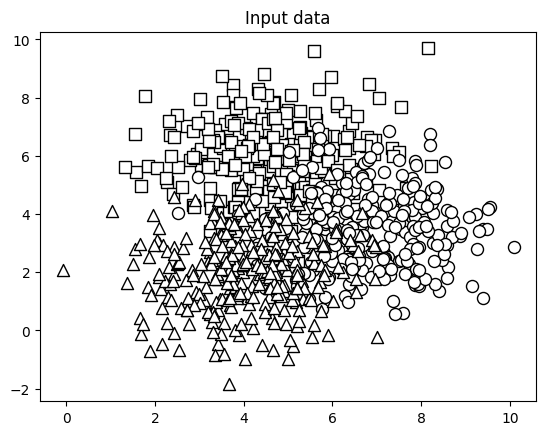

In [13]:
plt.figure()
plt.scatter(
      class_0[:, 0]
    , class_0[:, 1]
    , s=75
    , facecolors='white'
    , edgecolors='black'
    , linewidth=1
    , marker='s'
)
plt.scatter(
      class_1[:, 0]
    , class_1[:, 1]
    , s=75
    , facecolors='white'
    , edgecolors='black'
    , linewidth=1
    , marker='o'
)
plt.scatter(
      class_2[:, 0]
    , class_2[:, 1]
    , s=75
    , facecolors='white'
    , edgecolors='black'
    , linewidth=1
    , marker='^'
)
plt.title('Input data')

## Split data into training and testing datasets 

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=5
)

## Ensemble Learning classifier

In [15]:
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
if classifier_type == 'rf':
    classifier = RandomForestClassifier(**params)
else:
    classifier = ExtraTreesClassifier(**params)

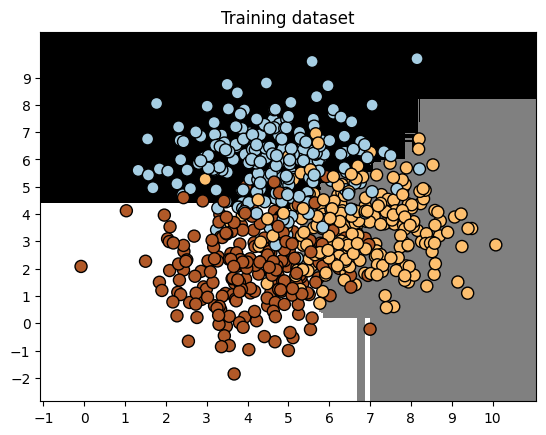

In [16]:
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

In [ ]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

## Evaluate classifier performance

In [17]:
class_names = ['Class-0', 'Class-1', 'Class-2']

In [19]:
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################



In [20]:
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

########################################



## Compute confidence

In [18]:
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

In [21]:
print("\nConfidence measure:")
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
    print('\nDatapoint:', datapoint)
    print('Predicted class:', predicted_class)


Confidence measure:

Datapoint: [5 5]
Predicted class: Class-0

Datapoint: [3 6]
Predicted class: Class-0

Datapoint: [6 4]
Predicted class: Class-1

Datapoint: [7 2]
Predicted class: Class-1

Datapoint: [4 4]
Predicted class: Class-2

Datapoint: [5 2]
Predicted class: Class-2


## Visualize the datapoints

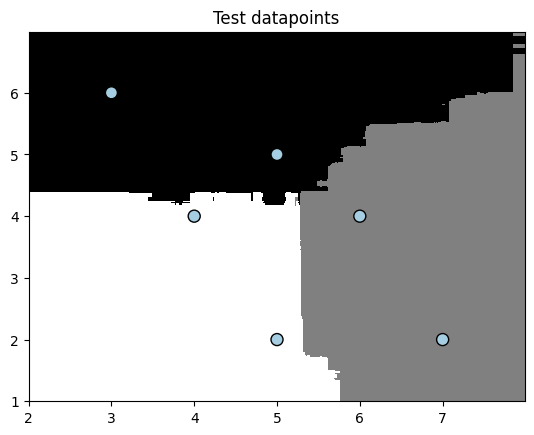

In [22]:
visualize_classifier(
      classifier
    , test_datapoints
    , [0]*len(test_datapoints)
    , 'Test datapoints'
)
plt.show()